In [1]:
println("Hello World")


Hello World


In [2]:
#Open the fragment of Hi-C matrix in Julia and build histogram of unique matrix values
#using Plots
#import Pkg; Pkg.add("Distributions"); Pkg.add("NPZ")
#using Distributions
using NPZ

io = npzread("test.npy");
#histogram(vec(io))

┌ Info: Precompiling NPZ [15e1cf62-19b3-5cfa-8e77-841668bca605]
└ @ Base loading.jl:1260


In [1]:
using Eirene

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14053904617315591317\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9556218723796230835\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14053904617315591317\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [4]:
#Use Eirene to find homologies for the matrix (warning: use no more than 100x100 matrix size)
C = eirene(io)



Dict{String,Any} with 12 entries:
  "symmat"   => [3349 3052 … 1 1; 3052 3349 … 1 1; … ; 1 1 … 3349 1; 1 1 … 1 33…
  "maxnz"    => [0, 1433, 30987, 1, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  92, 93, 94, 95, 96, 97, 98,…
  "cyclerep" => [[], [[2, 3], [31, 33], [65, 63], [16, 25], [68, 70], [55, 59],…
  "phi"      => [[], [100, 2537, 4249, 1389, 4424, 3919, 1384, 4864, 4214, 5  ……
  "plo"      => [[], [3, 33, 63, 25, 70, 59, 20, 87, 62, 6  …  61, 14, 11, 83, …
  "ocg2rad"  => [1.0, 0.993309, 0.991109, 0.987027, 0.982623, 0.979922, 0.97485…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97,…
  "nvl2ovl"  => [52, 48, 49, 68, 46, 53, 69, 39, 54, 47  …  5, 99, 100, 2, 1, 6…
  "input"    => Dict{String,Any}("genera"=>[0.0 1.0 … 1.0 1.0; 1.0 0.0 … 1.0 1.…
  "tid"      => [[], [3, 33, 63, 25, 70, 59, 20, 87, 62, 6  …  14, 11, 83, 55, …
  "grain"    => [[3349, 3349, 3349, 3349, 3349, 3349, 3349, 3349, 3349, 3349  ……

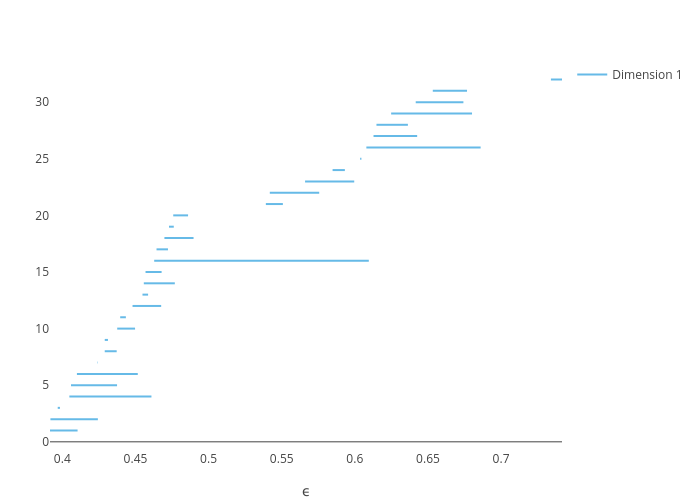

In [5]:

plotbarcode_pjs(C,dim=1)

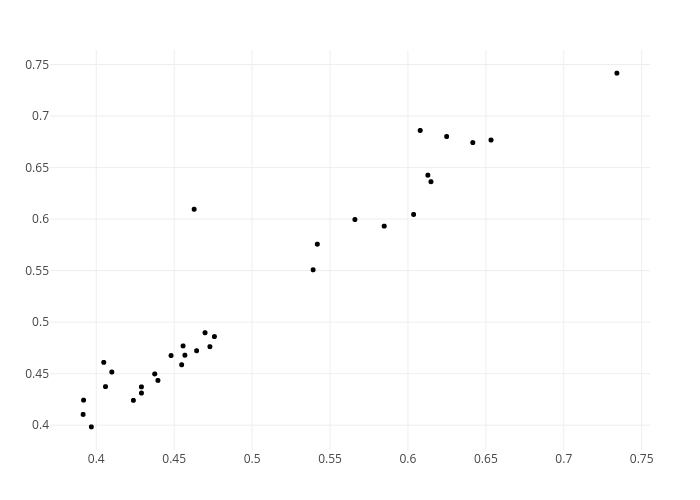

In [6]:
plotpersistencediagram_pjs(C,dim=1)


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


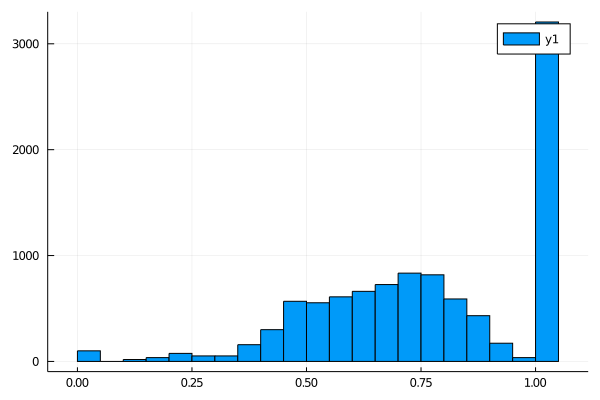

In [19]:
using Plots
histogram(vec(io))

In [3]:
paths = [i for i in readdir("DistMat") if occursin(".npy", i)]
paths[1:]

LoadError: syntax: missing last argument in "1:" range expression 

In [14]:
#Paths to your Hi-C distance matrices
using Eirene
using NPZ
using CSV
paths = [i for i in readdir("DistMat") if occursin(".npy")]

for path in paths
    
#    m = readdlm("dist_data/$path", ',', Float32);
    m = npzread("DistMat/$path");
    C = eirene(m, model="vr", maxdim=2, maxrad=0.5)
    
    #form DataFrame
    df = DataFrame(Replica = String[],
        Class = Int64[], Dim = Int64[], 
        Birth = Float64[], Death = Float64[], Lifetime = Float64[], 
        Numvert = Int64[], Range = Int64[],  Vertices = Array{Int64,1}[])

#Replica number (take from filename)
    rep = String(match(r"\d+.", path).match)
    
    maxdim=2
    for d in 1:maxdim
            bar = barcode(C, dim=d)
            dimsize = size(bar)[1]
            #n_cyclenumber = size(C["cyclerep"][d+2])[1]

            #  Dataframe: chr | class | dim | birth | death | lifetime | cycle rep
            #chrs = [chr for i in 1:dimsize]
            #segments = [segment for i in 1:dimsize]
            replicas = [rep for i in 1:dimsize]
            classes = [i for i in 1:dimsize]
            dims = [d for i in 1:dimsize]
            births = bar[:,1]
            deaths = bar[:,2]
            lifetimes = bar[:,2] - bar[:,1]
            #extract only unique vertices of representative cycles
            unique_vertices = [sort(unique(vec(classrep(C, class=cl, dim=d)))) for cl in 1:dimsize]
            numvert = [size(u)[1] for u in unique_vertices]
            range = [maximum(u) - minimum(u) for u in unique_vertices]

            tmpdf = DataFrame(  Replica = replicas,
                                Class = classes, Dim = dims, 
                                Birth = births, Death = deaths, Lifetime = lifetimes, 
                                Numvert = numvert, Range=range, Vertices = unique_vertices )
            append!(df, tmpdf)
        end
#save results to DataFrame
    savename = "./results/$path.csv"
    CSV.write(savename, df)
    print("save file: $savename")
    end

save file: ./test.csv